In [1]:
import numpy as np
from matplotlib import pyplot as plt
from utils.load_dataset import load_dataset
from utils.init_params import initialize_parameters
from utils.train import train
from utils.predict import predict

In [2]:
(train_set_x_orig, train_set_y), (test_set_x_orig, test_set_y) = load_dataset()

# Train dataset

m_train, num_px, num_px, n_channels = train_set_x_orig.shape

train_set_x = train_set_x_orig.reshape(num_px * num_px * n_channels, m_train)

train_set_x = train_set_x / np.max(np.abs(train_set_x_orig))
train_set_y = train_set_y.reshape(m_train, 1).T

p = np.random.permutation(train_set_x.shape[1])

train_set_x = train_set_x[:, p]
train_set_y = train_set_y[:, p]

# Test dataset

m_test, num_px, num_px, n_channels = test_set_x_orig.shape

test_set_x = test_set_x_orig.reshape(num_px * num_px * n_channels, m_test)

test_set_x = test_set_x / np.max(np.abs(test_set_x_orig))
test_set_y = test_set_y.reshape(m_test, 1).T

p = np.random.permutation(test_set_x.shape[1])

test_set_x = test_set_x[:, p]
test_set_y = test_set_y[:, p]

In [3]:
parameters = initialize_parameters((train_set_x.shape[0], 20, 7, 1))

In [4]:
num_iterations = 2500
learning_rate = 0.09

parameters_updated, costs = train(train_set_x, train_set_y, parameters,
                                  num_iterations=num_iterations, learning_rate=learning_rate,
                                  print_cost=True)

Cost after 0 iterations: 0.6869955553275382
Cost after 100 iterations: 0.020581754188385214
Cost after 200 iterations: 0.005812664612190006
Cost after 300 iterations: 0.0029479258492406727
Cost after 400 iterations: 0.0018612838946455658
Cost after 500 iterations: 0.001318408934336177
Cost after 600 iterations: 0.0010023497327007137
Cost after 700 iterations: 0.0007989842634506179
Cost after 800 iterations: 0.0006587168742986021
Cost after 900 iterations: 0.0005569354683469156
Cost after 1000 iterations: 0.00048013580889455396
Cost after 1100 iterations: 0.00042040130833614556
Cost after 1200 iterations: 0.0003727815027487547
Cost after 1300 iterations: 0.00033404387688995736
Cost after 1400 iterations: 0.0003019894638973434
Cost after 1500 iterations: 0.0002750795579049097
Cost after 1600 iterations: 0.0002522064982223994
Cost after 1700 iterations: 0.00023255380862504833
Cost after 1800 iterations: 0.00021550749931664192
Cost after 1900 iterations: 0.0002005976548759172
Cost after 20

In [9]:
train_Y_prediction = predict(train_set_x, parameters_updated)

In [10]:
test_Y_prediction = predict(test_set_x, parameters_updated)

It is a cat


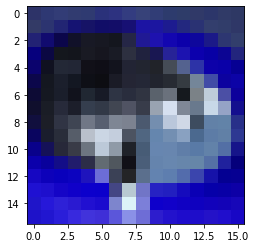

In [11]:
test_index = 42

plt.imshow(test_set_x_orig[test_index])

test_result = test_Y_prediction[0][test_index]

message = "It is a dog" if int(test_result) else "It is a cat"

print(message)

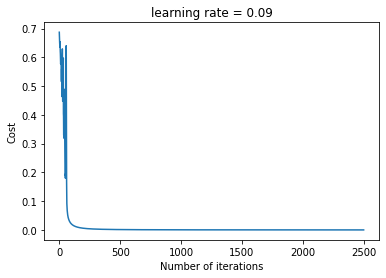

In [12]:
plt.plot(costs)
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.title(f"learning rate = {learning_rate}")
plt.show()

In [14]:
print(f"Train acuracy: {100 - np.mean(np.abs(train_Y_prediction - train_set_y)) * 100} %")
print(f"Test acuracy: {100 - np.mean(np.abs(test_Y_prediction - test_set_y)) * 100} %")

Train acuracy: 100.0 %
Test acuracy: 53.13890261987147 %
